# Работа с временнЫми данными

## Типизированные массивы с временем: тип `datetime64` в NumPy

NumPy предложил тип `datetime64` для работы со временем:

In [1]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Как только у нас есть дата в формате NumPy, мы можем быстро применить векторные операции:

In [2]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [3]:
# Только дата
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [4]:
# Дата и время
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [5]:
# Время с учётом наносекунд
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Доступные в NumPy коды формата времени https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units

### Даты и время в Pandas: лучшее из двух миров

Pandas имеет дополнительный тип `Timestamp` и `DatetimeIndex` для работы со временем и временнЫми рядами:

In [6]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [7]:
date.strftime("%A")

'Saturday'

Также доступны векторные операции:

In [8]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Ряды времени в Pandas: индексирование по времени

Мы можем создать объект типа `Series` содержащий индекс по дате:

In [9]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

После того, как у нас есть индекс по датам, мы можем использовать любые типы индексирования, которые мы рассмотрели ранее:

In [10]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [11]:
# Для получения среза можно передать даже просто год
data["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

## Структуры данных Pandas для хранения временных радов

Эта секция познакомит с фундаментальными структурами Pandas для работы с временными рядами:

* Для меток времени есть тип `Timestamp` и связанную структуру для индексов `DatetimeIndex`.
* Для периодов времени есть тип `Period` и связанную структуру для индексов `PeriodIndex`.
* Для разниц по времени или продолжительности, есть тип `Timedelta` и соответствующий индекс `TimedeltaIndex`.

Наиболее фундаментальные из них это `Timestamp` и `DatetimeIndex`. Эти классы могут использоваться напрямую, но обычно соответствующие объекты создаются через метод `pd.to_datetime()`. Причём могут использоваться различные типы представления даты:

In [12]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Любой объект типа `DatetimeIndex` может быть сконвертирован в `PeriodIndex` с помощью метода `to_period()` с возможностью указания частоты.

In [13]:
# Частота установлена в днях - `D`
dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

Объект типа `TimedeltaIndex` создается когда происходит вычитание дат:

In [14]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Регулярные последовательности: `pd.date_range()`

Чтобы создание рядов дат было более удобным, в Pandas есть несколько функций для этой цели:

* `pd.date_range()` для меток времени
* `pd.period_range()` для периодов времени
* `pd.timedelta_range()` для разниц времени

Можно указать дату начала, дату окончания и частоту (частота по умолчанию - 1 день):

In [15]:
pd.date_range("2015-07-03", "2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Также можно указать начальную дату и количество периодов:

In [16]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Частоту можно задать с помощью ключевого слова `freq`. Например далее мы создаём диапазон меток времени с частотой 1 час:

In [17]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
# Ежемесячные периоды
pd.period_range("2015-07", periods=8, freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [19]:
# Часовые дельты времени
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Частоты и смещения

Доступны следующие коды частот:

| Code | Description       | Code | Description          |
|------|-------------------|------|----------------------|
| `D`  | Calendar day      | `B`  | Business day         |
| `W`  | Weekly            |      |                      |
| `M`  | Month end         | `BM` | Business month end   |
| `Q`  | Quarter end       | `BQ` | Business quarter end |
| `A`  | Year end          | `BA` | Business year end    |
| `H`  | Hours             | `BH` | Business hours       |
| `T`  | Minutes           |      |                      |
| `S`  | Seconds           |      |                      |
| `L`  | Milliseconds      |      |                      |
| `U`  | Microseconds      |      |                      |
| `N`  | Nanoseconds       |      |                      |

Месячная, квартальная и годовая частота принимаются на конец каждого периода. Путём добавления суффикса `S`, указанные частоты будут приниматься на начало каждого периода:

| Code  | Description       | Code  | Description            |
|-------|-------------------|-------|------------------------|
| `MS`  | Month start       |`BMS`  | Business month start   |
| `QS`  | Quarter start     |`BQS`  | Business quarter start |
| `AS`  | Year start        |`BAS`  | Business year start    |

Также можно изменить месяц начала квартала или года с помощью суффиксов:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

Также и для недель:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

Поверх всего, коды можно комбинировать для получения уникальных частот. Например, для частоты 2 часа 30 минут, мы можем скомбинировать коды часа `H` и минуты `T`:

In [20]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Все эти короткие коды относятся к реальным объектам Pandas, которые могут быть найдены в модуле `pd.tseries.offsets`. Например мы можем напрямую использовать рабочий день:

In [21]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Ресемплирование, Сдвиг и Оконные функции

Pandas создавался для финансовых расчётов, поэтому он может быть легко использован для анализа биржевых данных.

Необходимо дополнительно установить пакет `pandas_datareader` (https://pydata.github.io/pandas-datareader/index.html) и использовать источник ['stooq'](https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-stooq)

In [22]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2012', end='2024', data_source='stooq')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,140.68,141.435,139.9000,140.93,14880961
2023-12-28,141.85,142.270,140.8283,141.28,12192549
2023-12-27,142.83,143.320,141.0512,141.44,17288358
2023-12-26,142.98,143.945,142.5001,142.82,11170066
2023-12-22,142.13,143.250,142.0550,142.72,18513524


In [23]:
# Выбор только цены закрытия
goog = goog["Close"]

In [24]:
# Мы можем построить график цен закрытия
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

<Axes: xlabel='Date'>

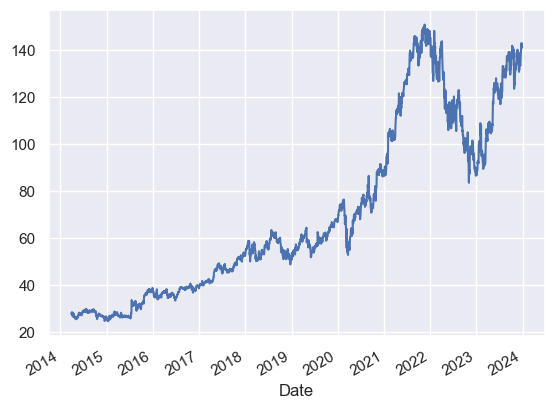

In [25]:
goog.plot()

### Ресемплинг и конвертация частот

Одна из частых задач при работе с временнЫми данными состоит в изменении частоты семплирования данных на более высокую или менее высокую (недельные данные перевести в месячные или недельные данные перевести в дневные). Для подобных задач используются методы `resample()` или, намного более простой, `asfreq()`. Главная разница состоит в том, что `resample()` это по сути _аггрегатор_, в то время как `asfreq()` осуществляет _извлечение_ данных.

Давайте сравним эти две функции на ценах закрытия `GOOG`:

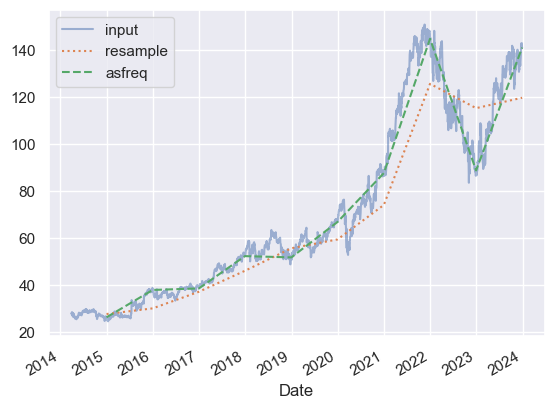

In [26]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

Обратите внимание на разницу: в каждой точке, `resample` возвращает _среднее_ за предыдущий год, тогда как `asfreq` возвращает _значение на конец года_.

Для повышения частоты, `resample` и `asfreq` работают почти одинаково, в тоже время `resample` имеет намного больше опций. В этом случае, поведением по умолчанию для обоих методов, является оставление более частых значений пустыми, т.е. заполненными NA значениями. Точно также как функция `pd.fillna()`, которую обсуждали ранее, `asfreq()` принимает в качестве аргумента `method` для указания того какие значения будут вставлены в пропущенные. Далее мы ресемплируем данные рабочих дней на ежедневную частоту, т.е. с учётом выходных:

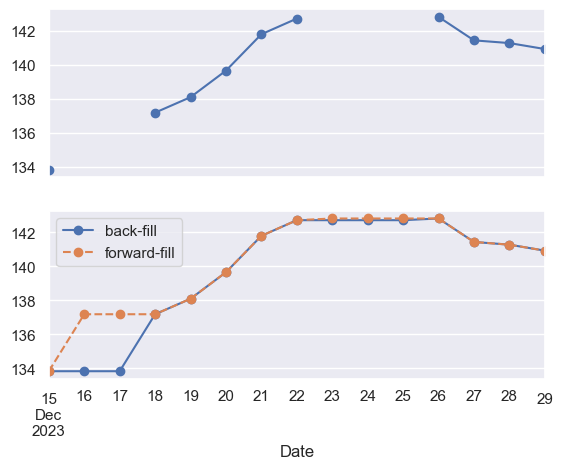

In [27]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill'])

Верхняя панель - это панель по умолчанию, выходные дни оставлены без значений (NA) и не отображаются на графике. Нижняя панель показывает разницу между двумя стратегиями для заполнения промежутков: forward-filling, backward-filling.

### Сдвиги времени

Другая популярная задача при работе с временнЫми данными - это сдвиг данных по времени. Pandas имеет два связанных метода для расчета сдвигов: `shift()` и `tshift()`. В кратце, разница между ними в том, что `shift()` _сдвигает данные_, в то время как `tshift()` _сдвигает индекс_. В обоих случаях сдвиг описывается количеством частот.
Далее мы будем использовать `shift()` и `tshift()` на 900 дней.

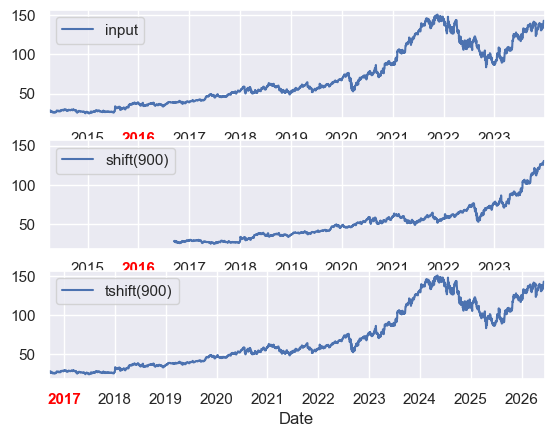

In [28]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(periods=900, freq='D').plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Как мы увидели, простой `shift()` сдвигает _данные_ на 900 дней, перемещая часть из них за пределы графика, в то время как `shift(freq='D')` сдвигает _индекс_ на 900 дней.

Частая задача для такого типа сдвигов состоит в вычислении разницы с течением времени. Например, мы можем использовать сдвинутые значения, чтобы вычислить ежегодную прибыль от вложений в акции GOOG:

Text(0, 0.5, '% Return on Investment')

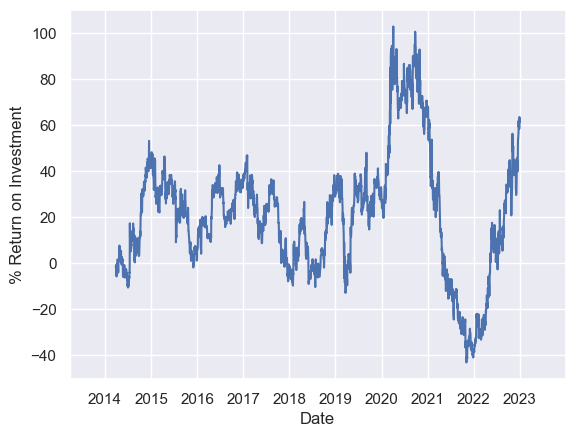

In [29]:
ROI = 100 * (goog.shift(periods=-365, freq='D') / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

### Скользящие окна

Это третий тип операций с временными рядами реализованный в Pandas. Такие операции могут быть выполнены с помощью метода `rolling()` объектов типа `Series` или `DataFrame`, который возвращает представление, очень похожее на тот, который мы видели в операции [`groupby`](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html). Это скользящее представление даёт возможность выполнения нескольких операций агрегирования.

Например, вот одногодичное стандатное скользящее среднее и стандартное отклонение для цен акций Google:

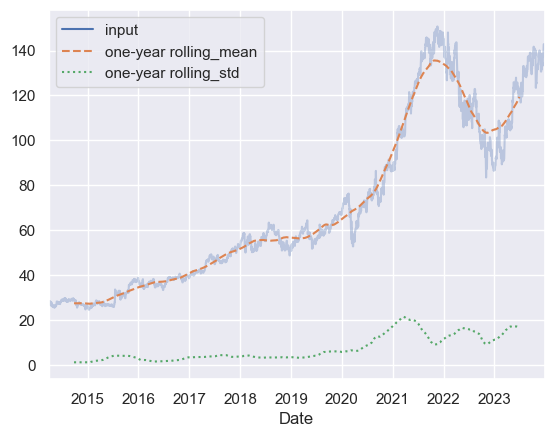

In [33]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Также как и с операциями группировки, методы `aggregate()` и `apply()` могут быть использованы для создания пользовательских скользящих вычислений.

## Где найти дополнительную информацию

- Официальная документация Pandas (http://pandas.pydata.org/pandas-docs/stable/timeseries.html)
- Книга `Python for Data Analysis` (http://shop.oreilly.com/product/0636920023784.do)

## Пример: визуализация количества велосипедов в Сиэтле

Набор данных можно скачать таким образом

`!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD`

In [70]:
data = pd.read_csv(
    './notebooks/data/Fremont_Bridge_Bicycle_Counter.csv',
    index_col='Date',
    parse_dates=True,
    date_format="%m/%d/%Y %I:%M:%S %p"
)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [71]:
data.columns = ['South', 'West', 'East']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,South,West,East,Total
count,100735.000000,100735.000000,100735.000000,100735.000000
mean,105.352827,45.553373,59.799454,105.352827
std,131.840748,60.090291,81.591238,131.840748
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000,13.000000
50%,59.000000,25.000000,32.000000,59.000000
75%,143.000000,62.000000,78.000000,143.000000
max,1097.000000,667.000000,850.000000,1097.000000


### Визуализация данных

In [73]:
%matplotlib inline
import seaborn
seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

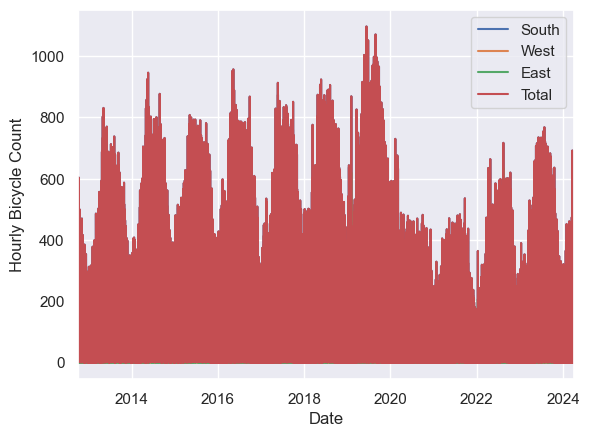

In [74]:
data.plot()
plt.ylabel("Hourly Bicycle Count")

Часовая дискретизация очень плотная, мы можем получить большее представление о данных путем передискретизации к более грубой сетке. Давайте передискретизируем по неделям:

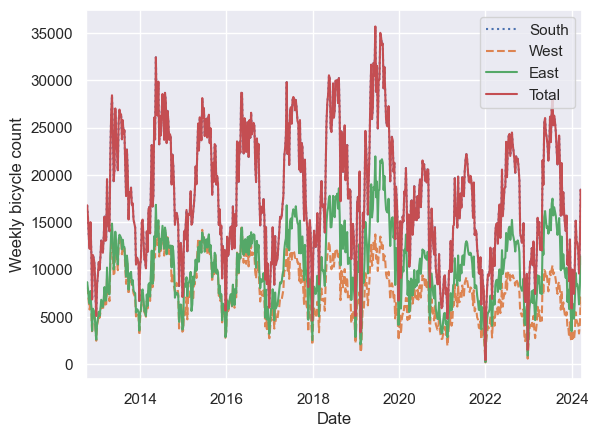

In [75]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Другой удобный способ представления агрегированных данных - использование скользящей средней, с помощью `pd.rolling_mean()`. Далее мы рассчитываем 30-дневную скользящую среднюю, центрируя при этом окно:

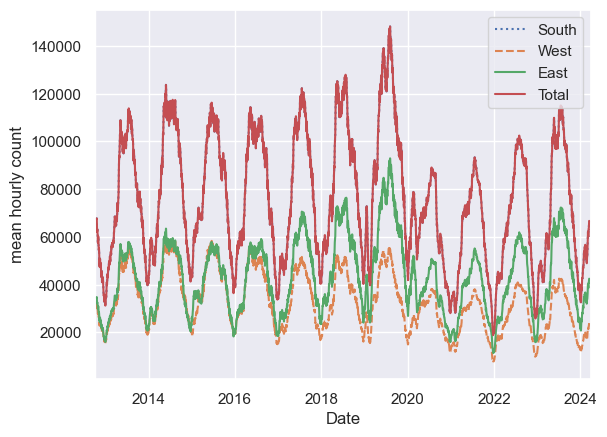

In [76]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

Причина "зубчатости" получившегося графика в резкой границе окна. Мы можем получить более сглаженную версию графика воспользовавшись оконной функцией, например Гауссовым окном. Следующий код задаёт как ширину окна (в нашем случае 50 дней), так и ширину Гауссовой функции внутри окна (в нашем случае 10 дней):

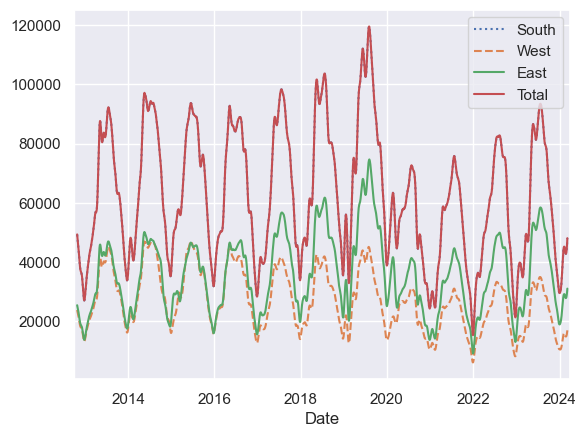

In [78]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Углубляемся в изучение данных

Хотя с помощью сглаженных представлений данных можно получить представление о трендах данных, они скрывают многие интересные нюансы структуры данных. Например, мы бы хотели увидеть средний велосипедный трафик как функцию от времени суток. Мы можем сделать это с помощью функциональности `GroupBy` обсуждавшейся [ранее](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html).

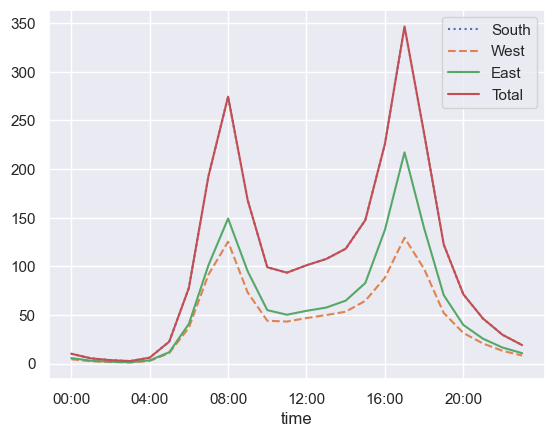

In [79]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

Часовой трафик представляет собой строгое бимодальное (два наиболее частых значения - две вершины) распределение, с пиками в 08:00 утра и около 17:00 вечера.

Нас также могут заинтересовать изменения ситуации по дням недели. Это можно сделать с помощью простого `groupby`:

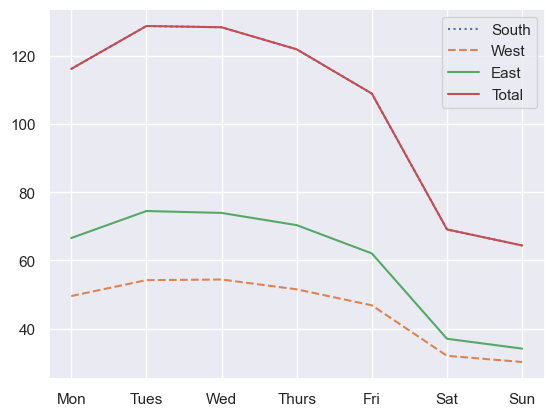

In [80]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Это показывает существенное различие между трафиком в будние и выходные дни.

Давайте попробуем сделать сложную операцию GroupBy и взглянуть на часовой тренд в будни по сравнению с выходными. Начнём с группировки как по признаку выходного дня, так и по времени суток:

In [81]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Теперь воспользуемся некоторыми инструментами из главы 4 https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 

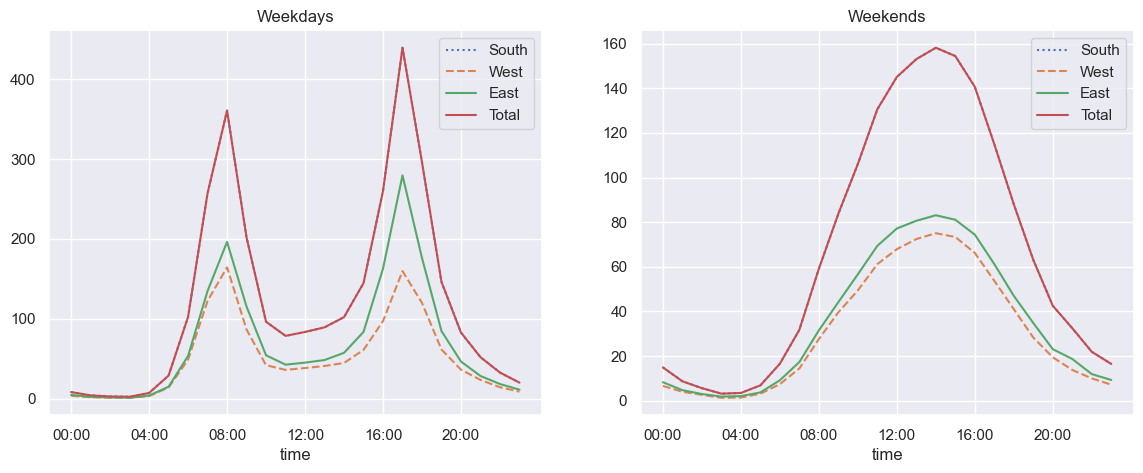

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);